In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Mall customer data**

- it has four columns having CustomerID,Age,Income and Spending score

- Spending score between 1 to 100

- More spending score means more valuable customer

- Income and Spending score are the important variables

- Group the data based on Income and Spending score

In [2]:
mall_df=pd.read_csv('Mall_Customers.csv')
mall_df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
mall_df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [4]:
mall_df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# Select only income and spending score columns
# M-1 : select by using column names
# M-2 : select by using iloc
# M-3 : by droping unwanted columns
X=mall_df.iloc[:,[3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

**Scatter Plots**

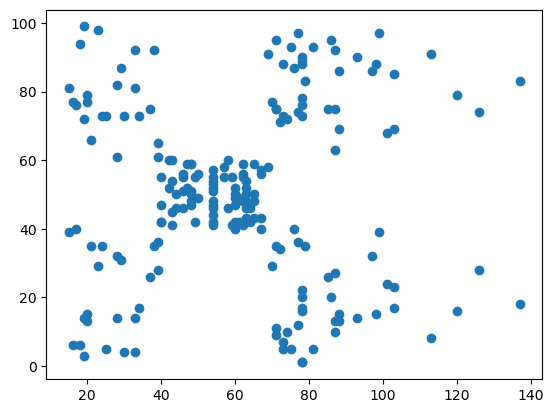

In [6]:
plt.scatter(mall_df['Annual Income (k$)'],mall_df['Spending Score (1-100)'])
plt.show()

$K-Means$

**WCSS**

- From above scatter we observed there might be 5 optimal clusters can be available

- in order to get optimal cluster we will use **elbow method**

- elbow method is a graph between cluster vs WCSS

- so first we will calculate wcss for one cluster i.e.k=1

- then we repeat the process for multiple clusters

- then we plot the graph

<img src="https://av-eks-blogoptimized.s3.amazonaws.com/62725cluster0.png" alt="K Means Clustering: Method to get most optimal K value" class=" nofocus" tabindex="0" aria-label="K Means Clustering: Method to get most optimal K value" role="button">

In [7]:
# we need to decide the number of clusters
# elbow method
# within cluster sum of square(WCSS)
# we randomly gives 10 clusters, for each 

**First we check for one cluster to understand within sum of square**

In [8]:
from sklearn.cluster import KMeans

In [9]:
### just applying one cluster
### Base model

In [10]:
kmeans_1=KMeans(n_clusters=1,max_iter=300,random_state=1234)
kmeans_1

# n_clusters=no.of clusters to choose
# max_iter=the distance calculations

KMeans(n_clusters=1, random_state=1234)

In [11]:
# select only annuval income and spending score
X=mall_df.iloc[:,[3,4]]

In [12]:
kmeans_1.fit(X)

KMeans(n_clusters=1, random_state=1234)

In [13]:
from sklearn.cluster import KMeans
kmeans_1=KMeans(n_clusters=1,max_iter=300,random_state=1234)
kmeans_1.fit(X)
# we are not intrested which data point
# belongs to which cluster
# bcz

KMeans(n_clusters=1, random_state=1234)

$Inertia$

- measures how well a dataset was clustered by K-Means

- it is calculated by measuring the distance between each data point and its centroid,squaring this distance

- and summing these squares across one cluster

- inertia also called as **Within cluster sum of squares(Wcss)**

- choose the clusters find the distance between each data point to the cluster centroid

- add all the distance is nothing but WCSS

In [14]:
kmeans_1.inertia_  # Variance

269981.28

In [15]:
means=kmeans_1.cluster_centers_
means

array([[60.56, 50.2 ]])

In [16]:
mall_df['Annual Income (k$)'].mean(),mall_df['Spending Score (1-100)'].mean()

(60.56, 50.2)

In [17]:
mean1=np.sum(mall_df['Annual Income (k$)'].values)/len(mall_df)
mean1

60.56

In [18]:
mean2=np.sum(mall_df['Spending Score (1-100)'].values)/len(mall_df)
mean2

50.2

In [19]:
np.sum(np.square(X.values-means))

269981.28

In [20]:
col1=mall_df['Annual Income (k$)']
col2=mall_df['Spending Score (1-100)']
np.sum((np.square(np.array(col1)-mean1)+(np.square(np.array(col2)-mean2))))

269981.28

In [21]:
import time
wcss=[]
for i in range(1,21):
    kmeans=KMeans(n_clusters=i,max_iter=300,random_state=1234)
    kmeans.fit(X)
    wcss.append(round(kmeans.inertia_,2))

In [22]:
wcss

# if you are increasing more clusters
#data points will be divided accross the clusters

[269981.28,
 185140.02,
 106348.37,
 73880.64,
 44448.46,
 37233.81,
 30241.34,
 29474.65,
 23977.39,
 20792.48,
 19295.24,
 16171.41,
 14749.86,
 13905.26,
 12413.87,
 10929.42,
 10069.84,
 9603.0,
 9287.58,
 8644.85]

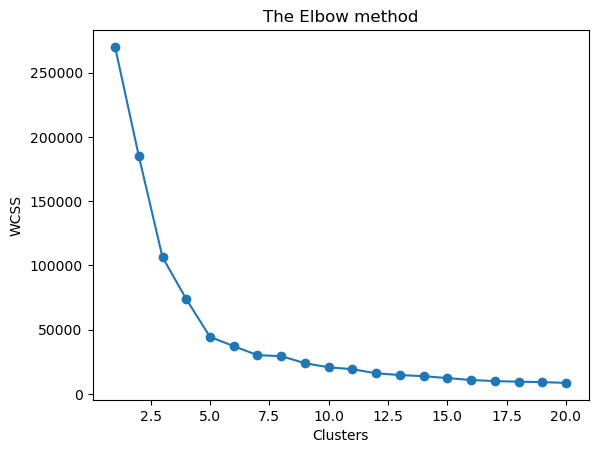

In [23]:
plt.scatter(range(1,21),wcss)
plt.plot(range(1,21),wcss)
plt.title('The Elbow method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

**Using elbow method we decided number of clusters are 5**

- now read the KMeans method

- give 5 clusters

- fit is using to calculate inertia

- once we got our optimal clusters , we need to get the clusters of each data point

- for that we need to use fit_predict

- predict the clusters on input X

In [24]:
kmeans=KMeans(n_clusters=5,max_iter=300,random_state=1234)
y_clusters=kmeans.fit_predict(X)
y_clusters

array([0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 4,
       0, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 3, 1, 4, 1, 3, 1, 3, 1,
       4, 1, 3, 1, 3, 1, 3, 1, 3, 1, 4, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [25]:
# here 0 = cluster_1
# and 4 = cluster_5
# python index start with zero
# y_clusters will give that
# we have 200 data points in X
# X[:3]
# income     spending score     cluster
#   15          39                 0       c1
#   15          81                 3       c4

In [26]:
mall_df['Cluster_group']=y_clusters

In [27]:
mall_df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,0
1,2,Male,21,15,81,2
2,3,Female,20,16,6,0
3,4,Female,23,16,77,2
4,5,Female,31,17,40,0


In [28]:
kmeans.cluster_centers_

array([[26.30434783, 20.91304348],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [55.2962963 , 49.51851852]])

**groupby**

In [29]:
mall_df.groupby('Cluster_group')
# 5groups

In [30]:
list(mall_df.groupby('Cluster_group'))

[(0,
      CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
  0            1    Male   19                  15                      39   
  2            3  Female   20                  16                       6   
  4            5  Female   31                  17                      40   
  6            7  Female   35                  18                       6   
  8            9    Male   64                  19                       3   
  10          11    Male   67                  19                      14   
  12          13  Female   58                  20                      15   
  14          15    Male   37                  20                      13   
  16          17  Female   35                  21                      35   
  18          19    Male   52                  23                      29   
  20          21    Male   35                  24                      35   
  22          23  Female   46                  25                      

In [31]:
list(mall_df.groupby('Cluster_group'))
mall_df.groupby('Cluster_group')['Cluster_group'].count()

Cluster_group
0    23
1    39
2    22
3    35
4    81
Name: Cluster_group, dtype: int64

In [32]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


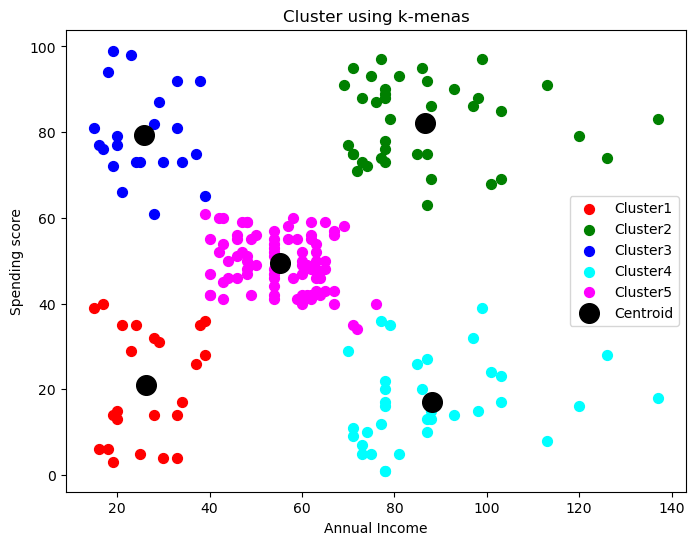

In [33]:
X=mall_df.iloc[:,[3,4]].values
plt.figure(figsize=(8,6))
plt.scatter(X[y_clusters==0,0],X[y_clusters==0,1],s=50,c='red',label='Cluster1')
plt.scatter(X[y_clusters==1,0],X[y_clusters==1,1],s=50,c='green',label='Cluster2')
plt.scatter(X[y_clusters==2,0],X[y_clusters==2,1],s=50,c='blue',label='Cluster3')
plt.scatter(X[y_clusters==3,0],X[y_clusters==3,1],s=50,c='cyan',label='Cluster4')
plt.scatter(X[y_clusters==4,0],X[y_clusters==4,1],s=50,c='magenta',label='Cluster5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='black',label='Centroid')
plt.title('Cluster using k-menas')
plt.xlabel('Annual Income')
plt.ylabel('Spending score')
plt.legend()
plt.show()

**Step 1: Import Required Library**

In [34]:
from sklearn.metrics import silhouette_score, silhouette_samples


**Step 2: Compute Silhouette Score for Overall Clustering**

- The Silhouette Score measures how well a data point fits within its assigned cluster. It ranges from -1 to 1:

- Close to +1 → Well-clustered
- Around 0 → Overlapping clusters
- Close to -1 → Misclassified

In [69]:
silhouette_avg = silhouette_score(X, y_clusters)
print(f"Overall Silhouette Score: {round(silhouette_avg,4)}")


Overall Silhouette Score: 0.5539


**Step 3: Compute Silhouette Score for Each Data Point**

- To see if specific points are well-clustered:

In [45]:
silhouette_values = silhouette_samples(X, y_clusters)

# Add silhouette scores to DataFrame
import pandas as pd
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])  # Change column names accordingly
df['Cluster'] = y_clusters
df['Silhouette Score'] = silhouette_values

# Display first few rows
df.head()


,Feature1,Feature2,Cluster,Silhouette Score
0,15,39,0,0.417005
1,15,81,2,0.696378
2,16,6,0,0.639953
3,16,77,2,0.696483
4,17,40,0,0.392300


**Step 4: Visualize Silhouette Scores**

- A Silhouette Plot helps interpret clustering performance.

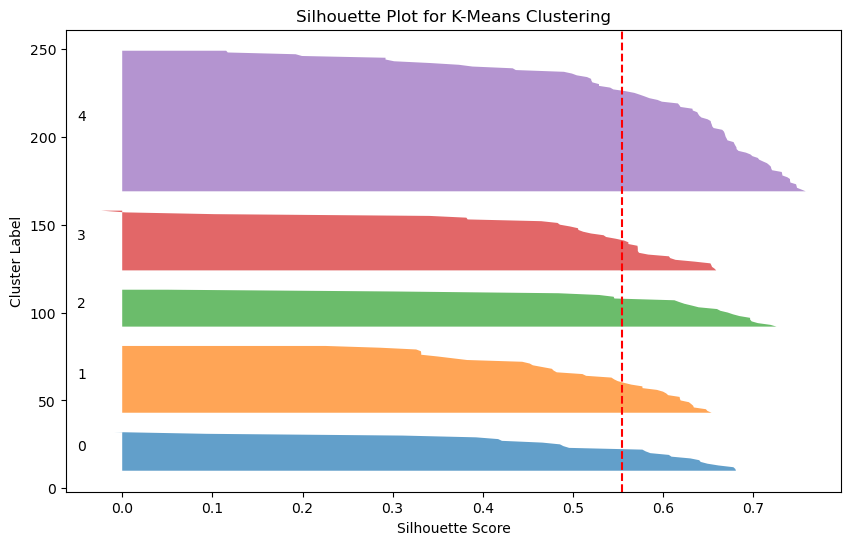

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Sort silhouette values by cluster
df_sorted = df.sort_values(by=['Cluster', 'Silhouette Score'], ascending=[True, False])

# Create plot
plt.figure(figsize=(10, 6))
y_lower = 10
for i in range(5):  # Change '5' to match your number of clusters
    cluster_silhouette_vals = df_sorted[df_sorted['Cluster'] == i]['Silhouette Score']
    cluster_size = len(cluster_silhouette_vals)
    y_upper = y_lower + cluster_size

    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * cluster_size, str(i))
    y_lower = y_upper + 10  

plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.xlabel("Silhouette Score")
plt.ylabel("Cluster Label")
plt.title("Silhouette Plot for K-Means Clustering")
plt.show()


**Step 5: Find Misclassified Points**

- To identify poorly clustered points:

In [38]:
poorly_clustered_points = df[df['Silhouette Score'] < 0.25]  # Threshold (adjustable)
print("Potential Misclassified Points:")
print(poorly_clustered_points)


Potential Misclassified Points:
     Feature1  Feature2  Cluster  Silhouette Score
40         38        35        0          0.093423
42         39        36        0         -0.009278
43         39        61        4          0.117076
45         39        65        2          0.050721
124        70        29        3          0.003516
126        71        35        4          0.199404
132        72        34        4          0.115294
133        72        71        1          0.225413
142        76        40        4          0.192368
146        77        36        3         -0.023381
160        79        35        3          0.101842


$Hierarchical   Cluster$

**Linkage functions**

- Every observation consider as one cluster

- Based on symmetry matrix we form the groups

- Linkage functions

    - Simple linkage : Less distance that means more realtion
    
    - Complete linkage : Max distance that means less realtion
    
    - Average Ward Method

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
import scipy.cluster.hierarchy as sch
X=mall_df.iloc[:,[3,4]]
sch.linkage(X,method='single')

array([[ 48.        ,  49.        ,   0.        ,   2.        ],
       [ 65.        ,  68.        ,   0.        ,   2.        ],
       [156.        , 158.        ,   0.        ,   2.        ],
       [129.        , 131.        ,   0.        ,   2.        ],
       [ 67.        ,  69.        ,   1.        ,   2.        ],
       [ 64.        ,  66.        ,   1.        ,   2.        ],
       [ 60.        ,  61.        ,   1.        ,   2.        ],
       [ 63.        , 201.        ,   1.        ,   3.        ],
       [ 51.        ,  53.        ,   1.        ,   2.        ],
       [ 74.        ,  77.        ,   1.        ,   2.        ],
       [ 85.        , 209.        ,   1.        ,   3.        ],
       [ 79.        ,  82.        ,   1.        ,   2.        ],
       [ 78.        ,  80.        ,   1.        ,   2.        ],
       [ 76.        , 212.        ,   1.        ,   3.        ],
       [ 75.        , 213.        ,   1.        ,   4.        ],
       [ 81.        , 214

In [48]:
import scipy.cluster.hierarchy as sch
X=[[15,39],[15,81],[16,6],[16,77],[17,40],[17,76]]
sch.linkage(X)

array([[ 3.        ,  5.        ,  1.41421356,  2.        ],
       [ 0.        ,  4.        ,  2.23606798,  2.        ],
       [ 1.        ,  6.        ,  4.12310563,  3.        ],
       [ 2.        ,  7.        , 33.01514804,  3.        ],
       [ 8.        ,  9.        , 36.        ,  6.        ]])

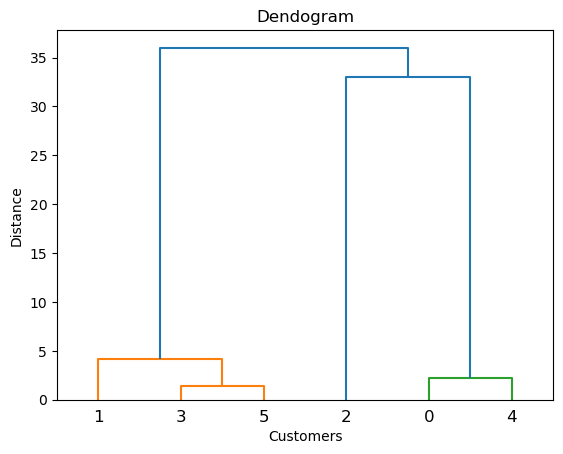

In [49]:
import matplotlib.pyplot as plt
dendogram=sch.dendrogram(sch.linkage(X,method='single'))
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.show()

In [50]:
a=[15,39]
b=[15,81]
np.sqrt((b[0]-a[0])**2+(b[1]-a[1])**2)

42.0

In [51]:
arr1=np.array(a)
arr2=np.array(b)
np.sqrt(np.sum(np.square(arr1-arr2)))

42.0

**np.linear algebra method**

In [52]:
# works when data is in array
import numpy as np
val=np.array([[15,39],[15,81],[16,6],[16,77],[17,40],[17,76]])   #  first point is fixed checking distance between all other points
np.linalg.norm(val[0] -val[1])

42.0

In [53]:
import numpy as np
X=np.array(mall_df.iloc[:,[3,4]])

for i in range(len(X)):
    for j in range(i+1,len(X)):
        print(f'the distance between point {X[i]} and {X[j]} is: {np.linalg.norm(X[i] -X[j])}')

the distance between point [15 39] and [15 81] is: 42.0
the distance between point [15 39] and [16  6] is: 33.015148038438355
the distance between point [15 39] and [16 77] is: 38.01315561749642
the distance between point [15 39] and [17 40] is: 2.23606797749979
the distance between point [15 39] and [17 76] is: 37.05401462729781
the distance between point [15 39] and [18  6] is: 33.13608305156178
the distance between point [15 39] and [18 94] is: 55.08175741568164
the distance between point [15 39] and [19  3] is: 36.22154055254967
the distance between point [15 39] and [19 72] is: 33.24154027718932
the distance between point [15 39] and [19 14] is: 25.317977802344327
the distance between point [15 39] and [19 99] is: 60.13318551349163
the distance between point [15 39] and [20 15] is: 24.515301344262525
the distance between point [15 39] and [20 77] is: 38.3275357934736
the distance between point [15 39] and [20 13] is: 26.476404589747453
the distance between point [15 39] and [20 79

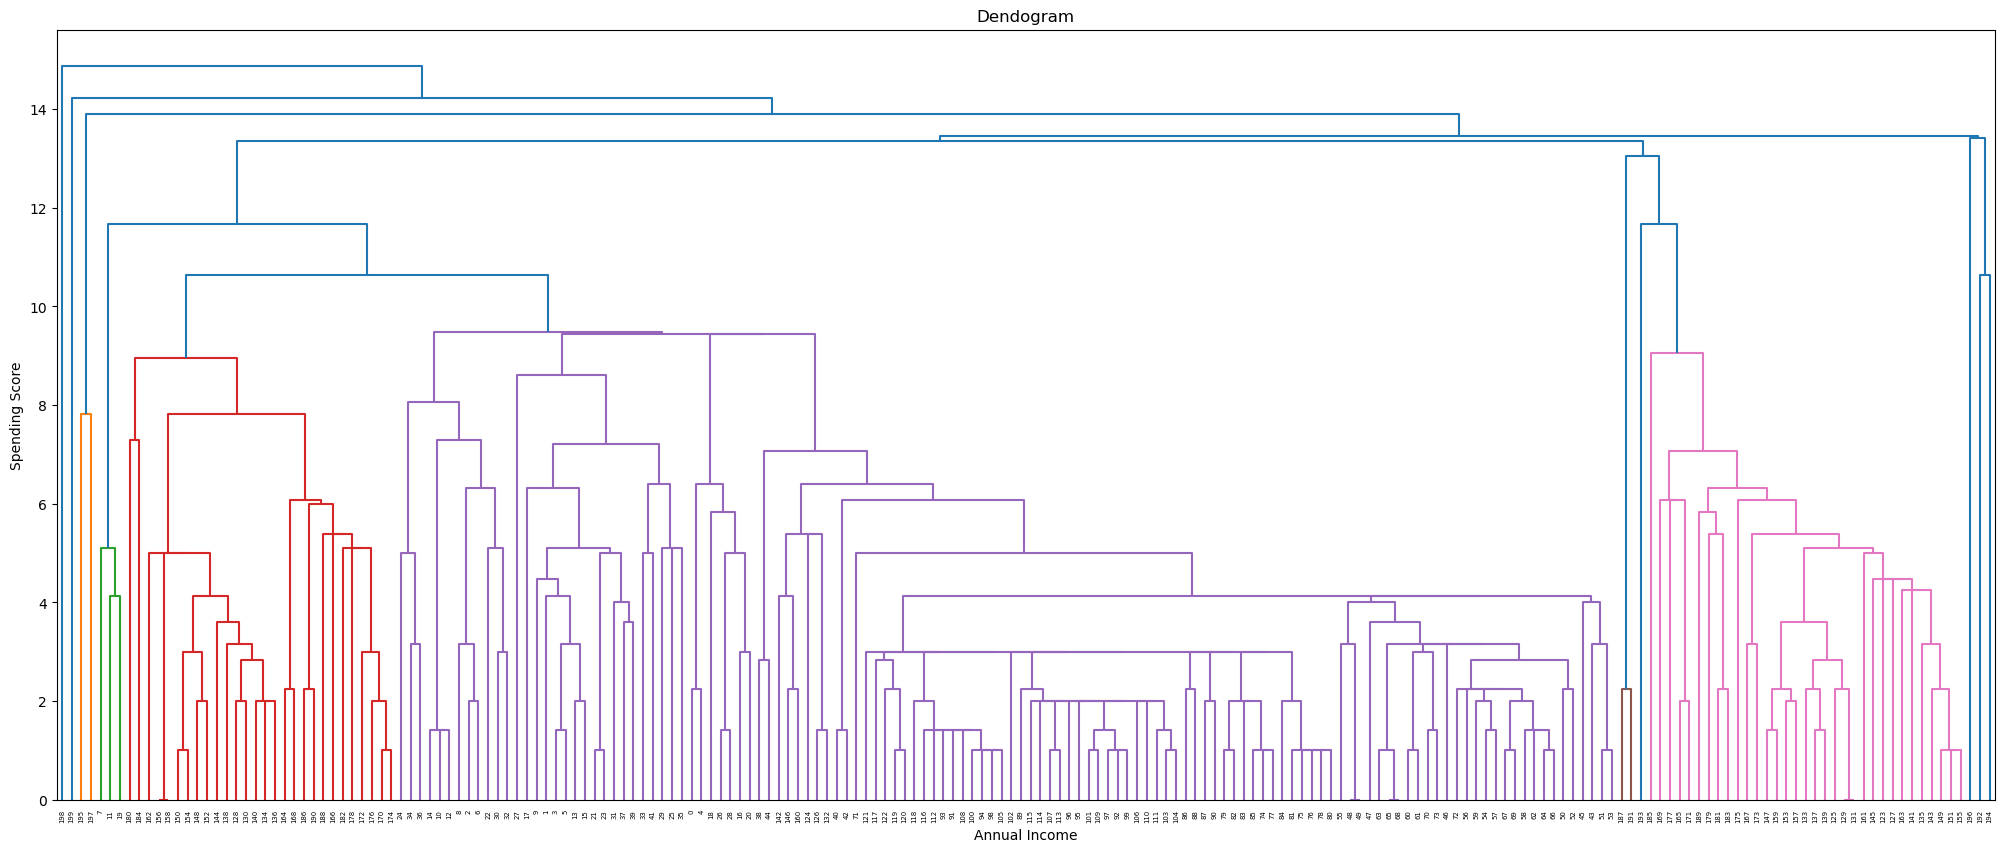

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,10))
dendogram=sch.dendrogram(sch.linkage(X,method='single'))
plt.title('Dendogram')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

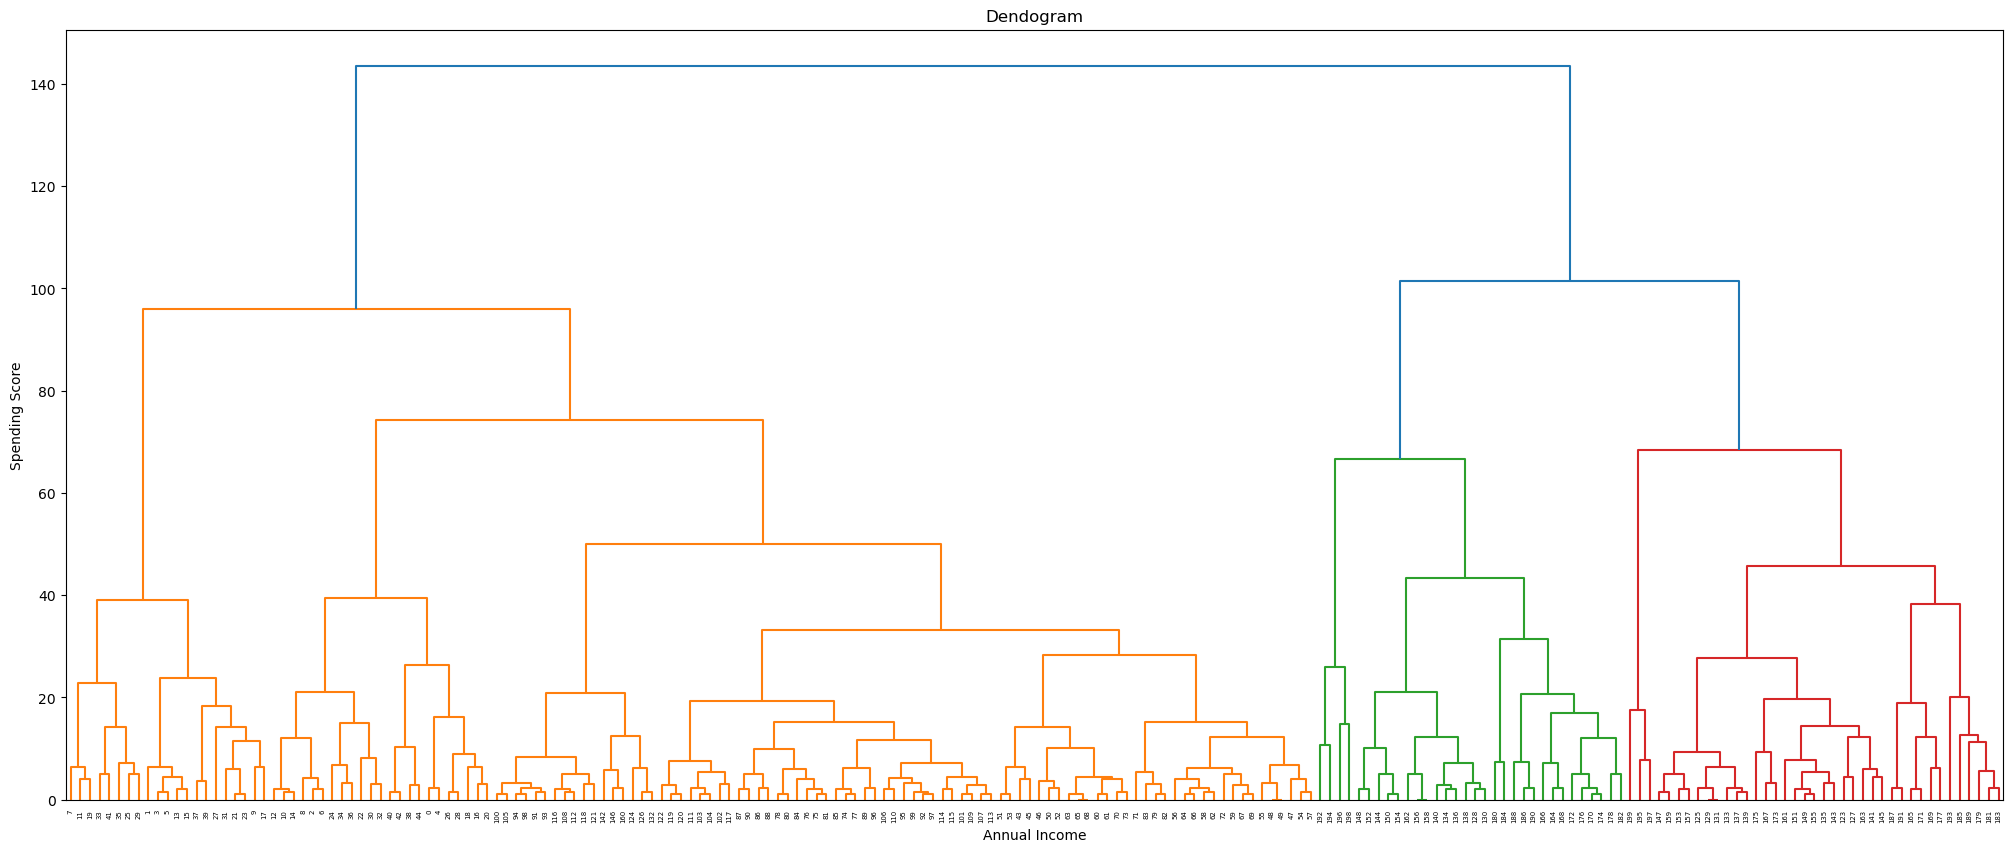

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,10))
dendogram=sch.dendrogram(sch.linkage(X,method='complete'))
plt.title('Dendogram')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

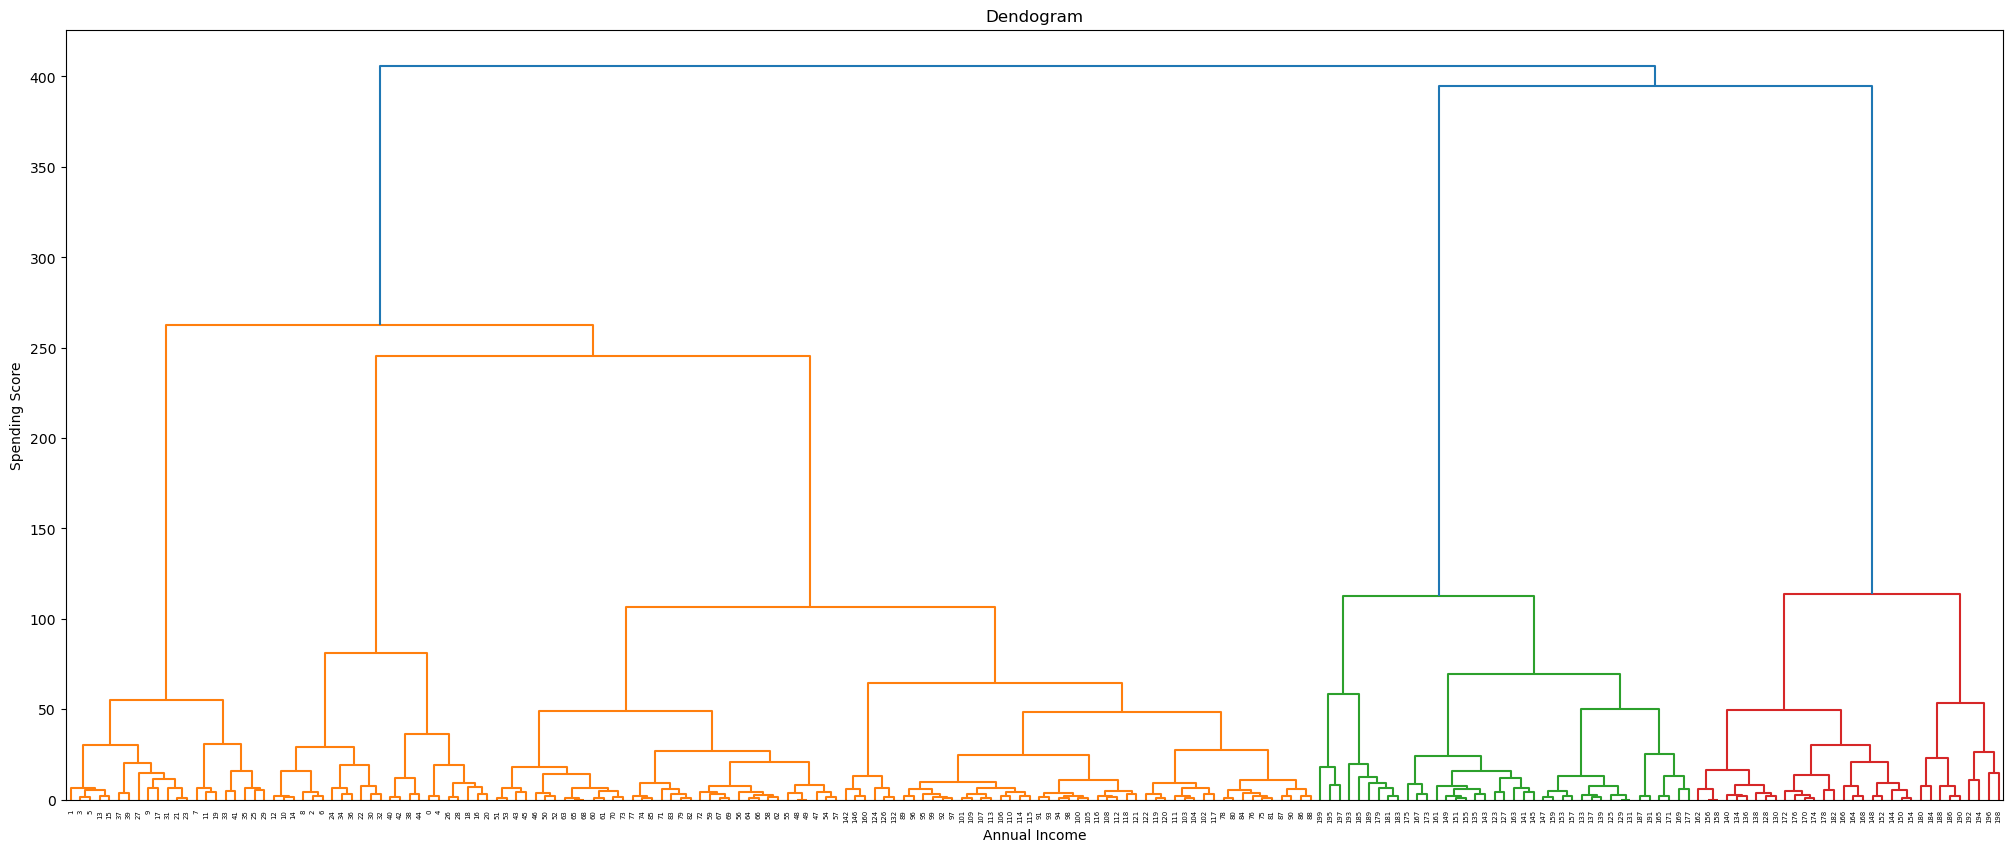

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,10))
dendogram=sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendogram')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

**Method-2**

In [57]:
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings("ignore")
hc=AgglomerativeClustering(n_clusters=5,
                           #affinity='euclidean', # shift+tab write the correct one
                           metric='euclidean',
                           linkage='ward')
y_hc=hc.fit_predict(X)
y_hc

# Those who are getting error affinity
# metric='euclidean'

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [58]:
y_clusters # kmeans cluster

array([0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 4,
       0, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 3, 1, 4, 1, 3, 1, 3, 1,
       4, 1, 3, 1, 3, 1, 3, 1, 3, 1, 4, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

- k-means ======= > 1 sample , 3rd sample ======= > 0
- hch =========== > 1 sample , 3rd sample ======= > 4

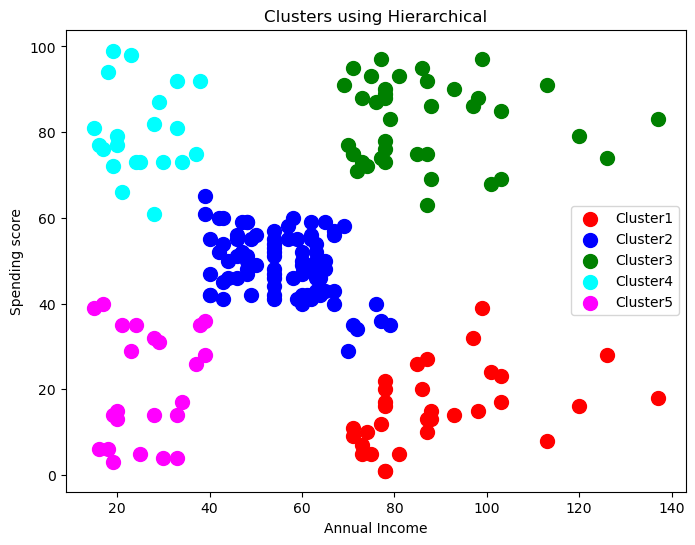

In [72]:
# Visulaize the clusters
# We are applying scatter plot between income and spending score w.r.t to clusters
plt.figure(figsize=(8,6))
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=100,c='red',label="Cluster1")
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=100,c='blue',label="Cluster2")
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=100,c='green',label="Cluster3")
plt.scatter(X[y_hc==3,0],X[y_hc==3,1],s=100,c='cyan',label="Cluster4")
plt.scatter(X[y_hc==4,0],X[y_hc==4,1],s=100,c='magenta',label="Cluster5")
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centriods')
plt.title("Clusters using Hierarchical")
plt.xlabel("Annual Income")
plt.ylabel("Spending score")
plt.legend()
plt.show()

In [68]:
# Compute the overall silhouette score
silhouette_avg_hierarchical = silhouette_score(X, y_hc)
print(f"Hierarchical Clustering Silhouette Score: {round(silhouette_avg_hierarchical,4)}")

Hierarchical Clustering Silhouette Score: 0.553


In [66]:
if silhouette_avg > silhouette_avg_hierarchical:
    print("K-Means performs better based on the Silhouette Score.")
else:
    print("Hierarchical Clustering performs better based on the Silhouette Score.")

K-Means performs better based on the Silhouette Score.
